# Collaboration and Competition

---

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

### 3. Run below cell to train the MADDPG agents


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
Episode 100	Average Score: 0.012 	Time/episode: 0.27
Episode 200	Average Score: 0.005 	Time/episode: 0.26
Episode 300	Average Score: 0.010 	Time/episode: 0.27
Episode 400	Average Score: 0.009 	Time/episode: 0.27
Episode 500	Average Score: 0.014 	Time/episode: 0.29
Episode 600	Average Score: 0.024 	Time/episode: 0.31
Episode 700	Average Score: 0.019 	Time/episode: 0.29
Episode 800	Average Score: 0.009 	Time/episode: 0.28
Episode 90

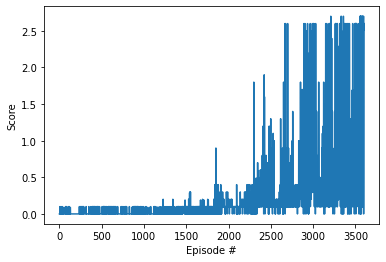

In [1]:
from maddpg import MADDPG
import torch
import numpy as np
import os
from utilities import *
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train_agents 
# get environment
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64" )

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

    # train parameters
n_episodes = 3600
save_score = 0.5

# create agent
maddpg = MADDPG()

load = False    # Load saved model
filename = "./model_dir/MADDPG_V1_Score_1.13-episode-3700.pt"
# Load model
if load:
    maddpg.load_model(filename)

scores = train_agents(maddpg, env, brain_name, n_episodes, target_score=save_score)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()

### 4. Test trained agent
Load the model file you want to use to test the trained agents. This cell can be run independently from the train agents above.

In [ ]:

!pip install imageio
# for saving gif
import imageio
from maddpg import MADDPG
import torch
import numpy as np
import os
from utilities import *
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment

# get environment
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64" )

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

N_games = 5
# Set load model
load = True

maddpg = MADDPG()
load_filename = "./model_dir/MADDPG_V1_Score_0.80-episode-3200.pt"
if load:  # Run environment setup before loading agent
    maddpg.load_model(load_filename)

# save info or not
save_gif = True
frames = []
tmax = 0    

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# number of agents 
num_agents = len(env_info.agents)
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
n=0

for n in range(N_games):
    while True:
        n+=1
        # select an action (for each agent)
        states_T = states_to_tensor(states)
        actions = maddpg.act(states_T)
        actions = action_to_environment(actions)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            print("time steps: ", n)
            break
        # save gif frame
        if save_gif:
            #frames.append(env.
            tmax+=1
    print('Total score (averaged over agents) this episode: {:.2f}'.format(np.mean(scores)))

env.close()